In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from scipy import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_data = pd.read_csv('Salesdata1.csv', sep =',')
df_data.head()

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
0,643,High,21,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
1,8995,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
2,9127,Not Specified,7,2039.56,Express Air,-329.49,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
3,26272,Low,6,905.94,Express Air,-4.19,Carlos Daly,Northwest Territories,Home Office,Furniture,Chairs & Chairmats,Hon Olson Stacker Stools,Large Box
4,36646,Medium,24,1168.15,Express Air,-743.96,Muhammed MacIntyre,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box


In [ ]:
df_data.columns

Index(['Order_ID ', 'Order_Priority', 'Order_Quantity', 'Sales', 'Ship_Mode',
       'Profit', 'Customer_Name', 'Region', 'Customer_Segment',
       'Product_Category', 'Product_Sub-Category', 'Product_Name',
       'Product_Container'],
      dtype='object')

In [ ]:
df_data.shape

(730, 13)

In [ ]:
len(df_data['Order_ID '].unique())

571

In [ ]:
df_id = df_data['Order_ID ']
df_data=df_data.drop(columns='Order_ID ')
df_data.columns

Index(['Order_Priority', 'Order_Quantity', 'Sales', 'Ship_Mode', 'Profit',
       'Customer_Name', 'Region', 'Customer_Segment', 'Product_Category',
       'Product_Sub-Category', 'Product_Name', 'Product_Container'],
      dtype='object')

In [ ]:
num_cols = df_data._get_numeric_data().columns
cont_cols = []
for i in num_cols:
  if(len(df_data[i].unique())) > int(df_data.shape[0]/25):
     cont_cols.append(i)
print (cont_cols)

['Order_Quantity', 'Sales', 'Profit']


In [ ]:
cat_cols = list(set(df_data.columns) - set(cont_cols))
cat_cols

['Product_Name',
 'Product_Sub-Category',
 'Ship_Mode',
 'Customer_Segment',
 'Product_Category',
 'Product_Container',
 'Region',
 'Order_Priority',
 'Customer_Name']

In [ ]:
df_data.describe()

,Order_Quantity,Sales,Profit
count,730.000000,730.000000,730.000000
mean,24.857534,1502.777653,207.479233
std,14.182970,2893.936648,878.631028
min,1.000000,8.600000,-4437.910000
25%,13.000000,171.098375,-77.132500
50%,25.000000,438.700000,0.035000
75%,37.000000,1480.855000,180.000000
max,50.000000,27663.920000,8417.570000


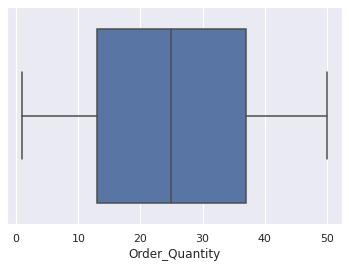

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.boxplot(x=df_data["Order_Quantity"])

Order Quantity lies between 0 to 50 and the maximum order quantity are between 14(approx) to 35(approx)

(array([518.,   0.,   0., 153.,   0.,   0.,  31.,   0.,   0.,  28.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

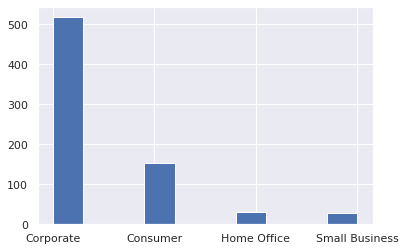

In [ ]:
plt.hist(df_data['Customer_Segment'])

Out of 730 Sales Record;

More than 500 orders are from Corporates

More than 100 orders are from Consumers

Approx 30-40 orders are from Home office

Aprox 20-30 orders are from Small Business

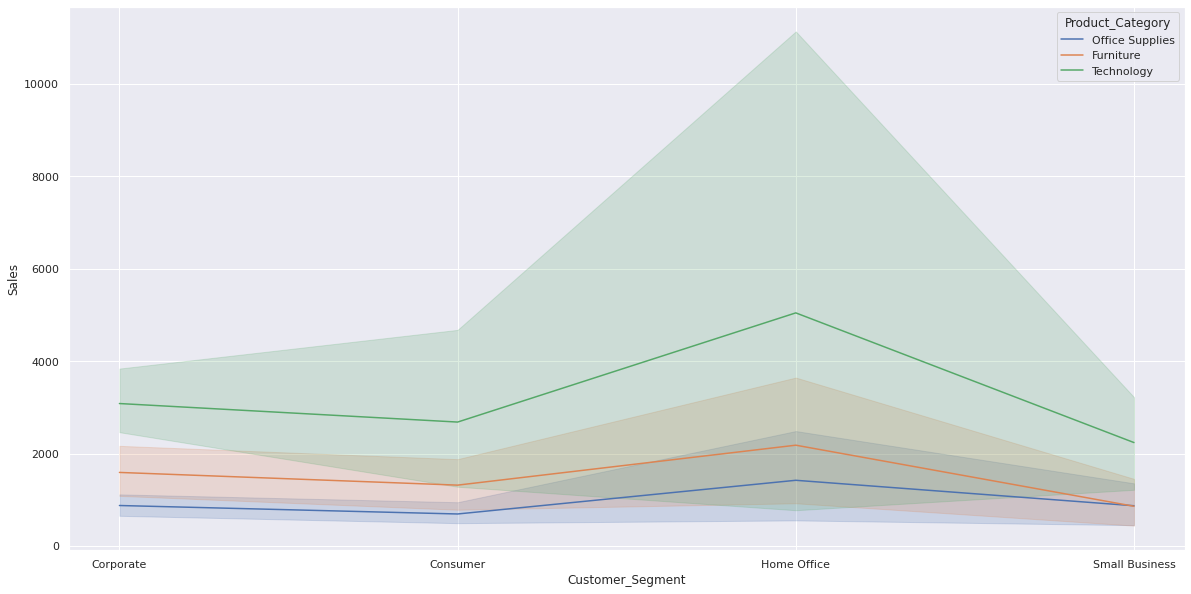

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=df_data, x="Customer_Segment", y="Sales",ax=ax,hue="Product_Category")

Sales of Technology are maximum ranging from - 1000 to 11000

Sales of furniture ranges from - 1000 to 3000(approx)

Sales of office Supplies ranges from - 100 to 2000 

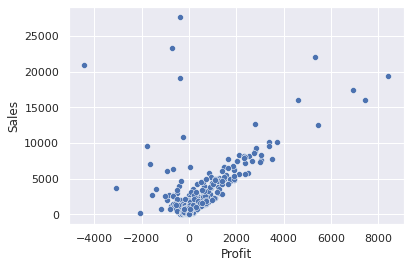

In [ ]:
sns.scatterplot(data=df_data, x = "Profit", y="Sales")

Profit data is varied in nature but the maximum of the data lies between -1000 to 4000